## Import Packages

In [427]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import tensorflow as tf

from matplotlib import cm
import matplotlib.pyplot as plt
import importlib
import time
from sklearn.datasets import make_hastie_10_2
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
# from joblib import dump, load
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import os

## construct data

In [414]:
my_data_file_path = "./data.csv"
# # read the data and store data in DataFrame
my_data = pd.read_csv(my_data_file_path)

totallist = ["mjj",
             "mll",
             "dyjj",
             "dPhijj",
             "mT",
             "sumC",
             "sumM",
             "pT_tot",
             "isGGH",
             "isGGH"]


features =["mjj",
           "mll",
           "dyjj",
           "dPhijj",
           "mT",
           "sumC",
           "sumM",
           "pT_tot",
           ]

my_data["target"] = my_data["isGGH"]
my_data["target"] = my_data["target"]+my_data["isVBF"]+my_data["isVBF"]
# print(len(my_data))


if os.path.exists("./BDT_Model_for_test") == 0:
    os.mkdir("./BDT_Model_for_test")
    path = "./BDT_Model_for_test/"
else:
    path = "./BDT_Model_for_test/"

counter = 0
for i, filename in enumerate(os.listdir(path)):
    if filename == "Data_train.csv" :
        counter += 1 
    elif filename == "Data_val.csv" :
        counter += 1 
    elif filename == "Data_test.csv" :
        counter += 1 
    

if counter == 0:
    ggH = shuffle(my_data[my_data["target"]==1])
    VBF = shuffle(my_data[my_data["target"]==2])
    
    
    ggH_train = ggH[:20000]
    VBF_train = VBF[:20000]
    
    ggH_val = ggH[2400:2400]
    VBF_val = VBF[2400:2400]

    ggH_test = ggH[20000:min(len(ggH),len(VBF))]
    VBF_test = VBF[20000:min(len(ggH),len(VBF))]

    
    print("{:^8}{:^8}{:^8}".format("","ggH","VBF"))
    print("{:^8}{:^8}{:^8}".format("total #",len(ggH),len(VBF)))
    print("{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train)))
    print("{:^8}{:^8}{:^8}".format("Val #",len(ggH_val),len(VBF_val)))
    print("{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test)))
    
    Data_train, Data_val, Data_test = ggH_train, ggH_val, ggH_test
    
    for element in [VBF_train]:
        Data_train = pd.concat([Data_train,element],ignore_index=True,axis=0,join='inner')
        
    for element in [VBF_val]:
        Data_val = pd.concat([Data_val,element],ignore_index=True,axis=0,join='inner')
        
    for element in [VBF_test]:
        Data_test = pd.concat([Data_test,element],ignore_index=True,axis=0,join='inner')
    
    Data_train.to_csv(path + "Data_train.csv",index = 0)
    Data_val.to_csv(path + "Data_val.csv",index = 0)
    Data_test.to_csv(path + "Data_test.csv",index = 0)
    
    
    
if counter == 3:
    
    Data_train = pd.read_csv(path + "Data_train.csv")
    Data_val = pd.read_csv(path + "Data_val.csv")
    Data_test = pd.read_csv(path + "Data_test.csv")
    
    ggH_train = Data_train[Data_train["isGGH"]==1]
    ggH_val = Data_val[Data_val["isGGH"]==1]
    ggH_test = Data_test[Data_test["isGGH"]==1]
    
    VBF_train = Data_train[Data_train["isVBF"]==1]
    VBF_val = Data_val[Data_val["isVBF"]==1]
    VBF_test = Data_test[Data_test["isVBF"]==1]

    print("{:^8}{:^8}{:^8}".format("","ggH","VBF"))
    print("{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train)))
    print("{:^8}{:^8}{:^8}".format("Val #",len(ggH_val),len(VBF_val)))
    print("{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test)))




X_train_unnormalized = Data_train[features]
Y_train = Data_train["target"]
X_test_unnormalized = Data_test[features]
Y_test = Data_test["target"]

print("\n")
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train_unnormalized),len(X_test_unnormalized),len(Y_train),len(Y_test)))


          ggH     VBF   
Train #  20000   20000  
 Val #     0       0    
 Test #   2562    2562  


         Xtrain  Xtest   Ytrain  Ytest  
Train #  40000    5124   40000    5124  


## normalize

In [415]:
X_train=(X_train_unnormalized-X_train_unnormalized.mean(axis=0))/X_train_unnormalized.std(axis=0)
X_test=(X_test_unnormalized-X_train_unnormalized.mean(axis=0))/X_train_unnormalized.std(axis=0)
print(X_train.mean(axis=0))
print(X_train.std(axis=0))
print(X_test.mean(axis=0))
print(X_test.std(axis=0))

mjj      -7.404866e-15
mll       6.397451e-15
dyjj      6.731116e-15
dPhijj    3.290100e-13
mT       -1.548927e-14
sumC     -5.500461e-16
sumM     -2.071021e-14
pT_tot    4.124179e-15
dtype: float64
mjj       1.0
mll       1.0
dyjj      1.0
dPhijj    1.0
mT        1.0
sumC      1.0
sumM      1.0
pT_tot    1.0
dtype: float64
mjj      -0.009183
mll       0.023744
dyjj     -0.012450
dPhijj    0.012429
mT        0.006992
sumC      0.008393
sumM     -0.000421
pT_tot    0.001542
dtype: float64
mjj       0.981686
mll       0.994280
dyjj      0.998670
dPhijj    0.997942
mT        1.114922
sumC      0.898881
sumM      1.032373
pT_tot    0.978145
dtype: float64


## optimize hyperparameter

In [422]:
if os.path.exists("./BDT_Model_for_train") == 0:
    os.mkdir("./BDT_Model_for_train")
    path = "./BDT_Model_for_train/"
else:
    path = "./BDT_Model_for_train/"
    

train_auc_record=np.zeros((5,10))
test_auc_record=np.zeros((5,10))
for i in range(5):
    for j in range(10):
        rand = np.random.randint(1000000)
        clf_GBDT = GradientBoostingClassifier(
                        n_estimators=500,
                        n_iter_no_change=5,
                        validation_fraction=0.2,
                        tol=0.001,
                        learning_rate=(j+1)/10,
                        max_depth=i+1, 
                        min_samples_split = 0.25,
                        min_samples_leaf = 0.05,
                        random_state= rand,  #np.random,
                        verbose = 0
                        )
        clf_GBDT.fit(X_train,Y_train)
        
        axis=1 
        prediction_GBDT_train = clf_GBDT.predict_proba(X_train)
        discriminator_train = prediction_GBDT_train[:,axis]
        discriminator_train = discriminator_train/(max(discriminator_train))
        
        prediction_GBDT_test = clf_GBDT.predict_proba(X_test)
        discriminator_test = prediction_GBDT_test[:,axis]
        discriminator_test = discriminator_test/(max(discriminator_test))

        y_train = to_categorical(Y_train-1)
        train_auc_record[i][j]=metrics.roc_auc_score(y_train[:,axis],discriminator_train)
       
        y_test = to_categorical(Y_test-1)
        test_auc_record[i][j]=metrics.roc_auc_score(y_test[:,axis],discriminator_test)
        

In [423]:
print(train_auc_record)
(max_depth_index,max_lerning_rate_index)=np.unravel_index(train_auc_record.argmax(), train_auc_record.shape)
print(max_depth_index,max_lerning_rate_index)
max_depth=max_depth_index+1
max_lerning_rate=(max_lerning_rate_index+1)/10
print(train_auc_record[max_depth_index][max_lerning_rate_index])


print(test_auc_record)
(max_depth_index,max_lerning_rate_index)=np.unravel_index(test_auc_record.argmax(), test_auc_record.shape)
print(max_depth_index,max_lerning_rate_index)
max_depth=max_depth_index+1
max_lerning_rate=(max_lerning_rate_index+1)/10
print(test_auc_record[max_depth_index][max_lerning_rate_index])

#ggh 
# [[0.7937422  0.79689211 0.80095945 0.80105831 0.80175222 0.79963572
#   0.80210198 0.80060734 0.8012946  0.80263793]
#  [0.81125476 0.818853   0.81723638 0.8195216  0.81818154 0.8199252
#   0.81777567 0.82056531 0.82134393 0.81777376]
#  [0.81573239 0.82012321 0.82164416 0.8213478  0.82001413 0.82295907
#   0.82069603 0.82102711 0.82124008 0.82252247]
#  [0.81893709 0.82280125 0.82278474 0.82174343 0.8237839  0.8245993
#   0.82341081 0.82437072 0.82019887 0.82227379]
#  [0.81980229 0.82156268 0.82427026 0.82414913 0.82320253 0.82331017
#   0.82520682 0.8258766  0.82231933 0.82512799]]
# 4 7
# 0.8258765975
# [[0.78280105 0.78583914 0.78839625 0.78697079 0.78673259 0.78606393
#   0.78701886 0.78701017 0.78826416 0.78838193]
#  [0.79789183 0.80409475 0.80244168 0.80504793 0.80335441 0.80353357
#   0.80141652 0.80260911 0.80547367 0.80013091]
#  [0.79995426 0.80396449 0.805283   0.8033688  0.80497175 0.80455477
#   0.80439259 0.80559585 0.80010456 0.80363602]
#  [0.80275362 0.8047315  0.80627343 0.80515967 0.80612481 0.80551907
#   0.80422448 0.80133577 0.80275872 0.79948929]
#  [0.80412088 0.80389136 0.80617745 0.80520614 0.80385472 0.80439953
#   0.80731702 0.80672842 0.8019713  0.80471017]]
# 4 6
# 0.8073170233783741

#vbf
# [[0.79407195 0.79918044 0.80072014 0.79932701 0.80230995 0.80049236
#   0.80155646 0.80151441 0.80421399 0.8057848 ]
#  [0.80991542 0.81516958 0.81861351 0.81748903 0.81781975 0.81960271
#   0.8186262  0.81784207 0.81953045 0.81835971]
#  [0.81868601 0.81984911 0.82255346 0.82270294 0.82216663 0.82199505
#   0.82163321 0.82236758 0.82431039 0.82319658]
#  [0.81856928 0.82170674 0.82199318 0.8255619  0.82643357 0.8235319
#   0.82155377 0.82226595 0.82420584 0.81864444]
#  [0.8196005  0.82351336 0.82482225 0.82582061 0.82552626 0.82582071
#   0.82526247 0.82205174 0.81988463 0.8219476 ]]
# 3 4
# 0.82643357
# [[0.78261473 0.78730215 0.78866248 0.78615503 0.78697757 0.7863294
#   0.78649782 0.78790355 0.79015048 0.79097309]
#  [0.79644595 0.80081504 0.80472144 0.80201891 0.80311979 0.80440014
#   0.80278264 0.80098613 0.8019876  0.79950689]
#  [0.80254177 0.80356617 0.80436243 0.80545379 0.8033701  0.8062556
#   0.80515602 0.80639081 0.80532238 0.80215107]
#  [0.80266952 0.80472837 0.80446907 0.80607621 0.80646196 0.80498851
#   0.80301566 0.80432251 0.80374777 0.79993636]
#  [0.80350599 0.80512943 0.80715142 0.80600095 0.80475092 0.8041761
#   0.80534006 0.80290513 0.80185925 0.80475435]]
# 4 2
# 0.8071514191988718

[[0.79407195 0.79918044 0.80072014 0.79932701 0.80230995 0.80049236
  0.80155646 0.80151441 0.80421399 0.8057848 ]
 [0.80991542 0.81516958 0.81861351 0.81748903 0.81781975 0.81960271
  0.8186262  0.81784207 0.81953045 0.81835971]
 [0.81868601 0.81984911 0.82255346 0.82270294 0.82216663 0.82199505
  0.82163321 0.82236758 0.82431039 0.82319658]
 [0.81856928 0.82170674 0.82199318 0.8255619  0.82643357 0.8235319
  0.82155377 0.82226595 0.82420584 0.81864444]
 [0.8196005  0.82351336 0.82482225 0.82582061 0.82552626 0.82582071
  0.82526247 0.82205174 0.81988463 0.8219476 ]]
3 4
0.82643357
[[0.78261473 0.78730215 0.78866248 0.78615503 0.78697757 0.7863294
  0.78649782 0.78790355 0.79015048 0.79097309]
 [0.79644595 0.80081504 0.80472144 0.80201891 0.80311979 0.80440014
  0.80278264 0.80098613 0.8019876  0.79950689]
 [0.80254177 0.80356617 0.80436243 0.80545379 0.8033701  0.8062556
  0.80515602 0.80639081 0.80532238 0.80215107]
 [0.80266952 0.80472837 0.80446907 0.80607621 0.80646196 0.80498851

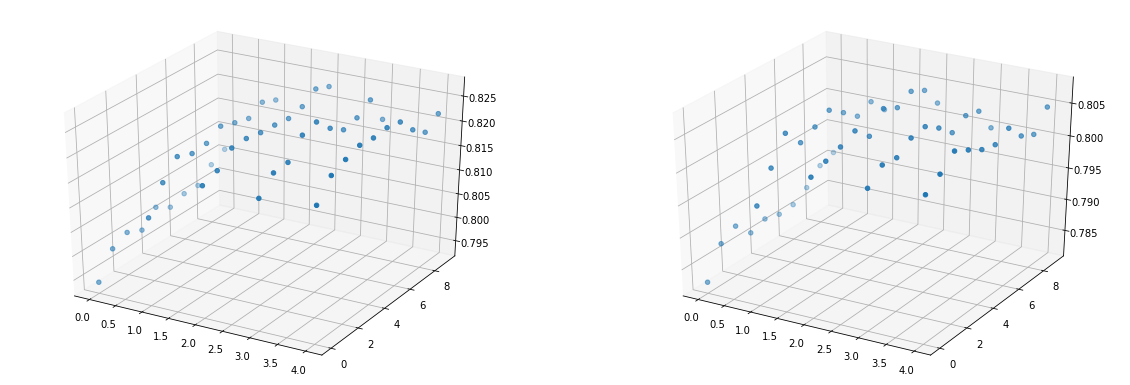

In [450]:
fig = plt.figure(figsize=(20, 15))
plt1 = fig.add_subplot(221, projection='3d')
plt2 = fig.add_subplot(222, projection='3d')
x=[]
y=[]
z1=[]
z2=[]
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].:
for i in range(5):
    for j in range(10):
        x.append(i)
        y.append(j)
        z1.append(train_auc_record[i][j])
        z2.append(test_auc_record[i][j])
        
plt1.scatter(x, y, z1, marker='o')
plt2.scatter(x, y, z2, marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

plt.show()

## train

In [404]:
if os.path.exists("./BDT_Model_for_train") == 0:
    os.mkdir("./BDT_Model_for_train")
    path = "./BDT_Model_for_train/"
else:
    path = "./BDT_Model_for_train/"
    
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################

GBDT, Ada = 0, 0
for i, filename in enumerate(os.listdir(path)):
    if filename == "clf_GBDT.h5" :
        GBDT += 1 
    elif filename == "clf_Ada.h5" :
        Ada += 1 

if GBDT == 0:
    rand = np.random.randint(1000000)
    # clf_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1, random_state=0).fit(X,Y)
    clf_GBDT = GradientBoostingClassifier(
                n_estimators=500,
                n_iter_no_change=5,
                validation_fraction=0.2,
                tol=0.001,
                learning_rate=max_lerning_rate,
                max_depth=max_depth, 
                min_samples_split = 0.25,
                min_samples_leaf = 0.05,
    #             min_impurity_split = 0.00001,
    #             validation_fraction = 0.1,
                random_state= rand,  #np.random,
                verbose = 1
                )
    clf_GBDT.fit(X_train,Y_train)
    dump(clf_GBDT, path+"clf_GBDT.h5")
    
ticks_2 = time.time()
    
if Ada == 0:
    clf_Ada = AdaBoostClassifier(
             DecisionTreeClassifier(max_depth=2),
             n_estimators=500,
             learning_rate=1
             )
    
    clf_Ada.fit(X_train,Y_train)
    dump(clf_Ada, path+"clf_Ada.h5")

if GBDT == 1:
    clf_GBDT = load(path+"clf_GBDT.h5")
if Ada == 1:
    clf_Ada = load(path+"clf_Ada.h5")

############################################################################################################################################################
ticks_3 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[32mTime consumption : {:.4f} min for GBDT\033[0m".format(totaltime/60.))
totaltime =  ticks_3 - ticks_2
print("\033[33mTime consumption : {:.4f} min for AdaBDT\033[0m".format(totaltime/60.))


Mon Sep 07 01:56:37 2020
      Iter       Train Loss   Remaining Time 
         1           1.1827           57.94s
         2           1.1302           58.93s
         3           1.1105           57.80s
         4           1.0964            1.04m
         5           1.0808            1.01m
         6           1.0673            1.01m
         7           1.0637           58.29s
         8           1.0588           59.76s
         9           1.0517           59.76s
        10           1.0479            1.02m
        20           1.0302            1.04m
Time consumption : 0.0553 min for GBDT
Time consumption : 0.8101 min for AdaBDT


## importance for each BDT

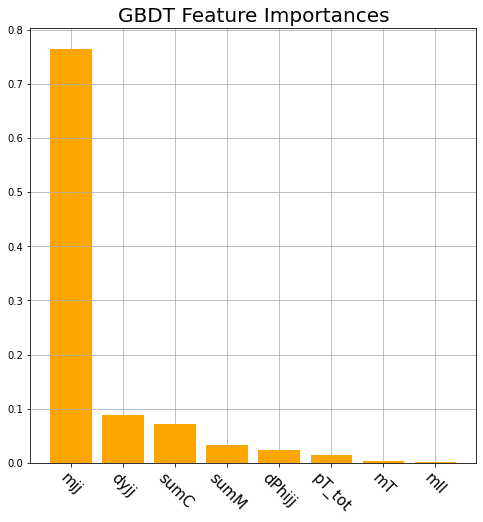

In [406]:
namelist = ["mjj",
             "mll",
             "dyjj",
             "dPhijj",
             "mT",
             "sumC",
             "sumM",
             "pT_tot",
            ]
pridict_model="GBDT"
if pridict_model == "GBDT":
    importances = clf_GBDT.feature_importances_
if pridict_model == "Ada":
    importances = clf_Ada.feature_importances_

indices = np.argsort(importances)[::-1]

namelist_inorder = []
for i in indices:
    namelist_inorder.append(namelist[i])


plt.figure(figsize=(8,8))
plt.title("{a} Feature Importances".format(a=pridict_model),fontsize=20)

plt.bar(range(X_train.shape[1]), 
         importances[indices],
         color="orange", 

         align="center")
plt.grid(True)
plt.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)

# plt.xlim([-1, X_train.shape[1]])
plt.show()

## pridict result

[[1770  792]
 [ 668 1894]]
          ggH ratio VBF ratio ggH eff.  VBF eff.  
ggH-like   72.60    27.40     69.09     26.07  
VBF-like   29.49    70.51     30.91     73.93  


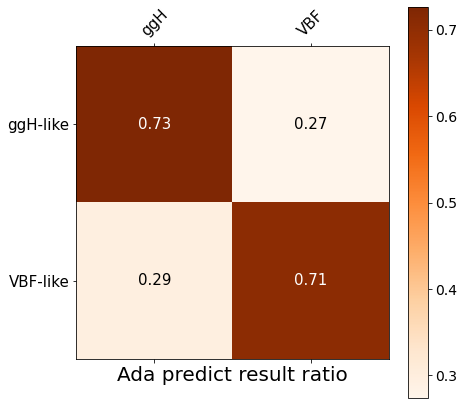

In [407]:
pridict_model="Ada"
if pridict_model == "GBDT":
    confusion = confusion_matrix(Y_test, clf_GBDT.predict(X_test))
if pridict_model == "Ada":
    confusion = confusion_matrix(Y_test, clf_Ada.predict(X_test))

    
print(confusion)
dim=confusion.shape[1] 
ratio, eff = np.zeros(dim*dim), np.zeros(dim*dim)
k = 0
for i in range(dim):
    for j in range(dim):
        ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
        eff[k] = (confusion[j][i]/np.sum(confusion,axis=1)[j])*100.

        k += 1

print("{:^8}  {:^8} {:^8} {:^9} {:^9} ".format("","ggH ratio","VBF ratio","ggH eff.","VBF eff."))
print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f}".format("ggH-like",ratio[0],ratio[1],eff[0],eff[1]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f}".format("VBF-like",ratio[2],ratio[3],eff[2],eff[3]))

 
truelist = ["ggH","VBF"]
likelist = ["ggH-like","VBF-like"]

s = len(truelist)
f = plt.figure(figsize=(s+5, s+5))

confusion_ = np.array([[ ratio[0],ratio[1]],
                        [ratio[2],ratio[3]]])/100
                       
plt.matshow(confusion_,fignum=f.number, cmap="Oranges")
plt.title("{a} predict result ratio".format(a=pridict_model),fontsize=20,pad=-350)
plt.xticks(range(confusion_.shape[1]), truelist, fontsize=15, rotation=45)
plt.yticks(range(confusion_.shape[1]), likelist, fontsize=15)
plt.ylim((1.5,-0.5))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
for (i, j), z in np.ndenumerate(confusion_):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',fontsize=15,color=colors)

plt.show()

## roc curve

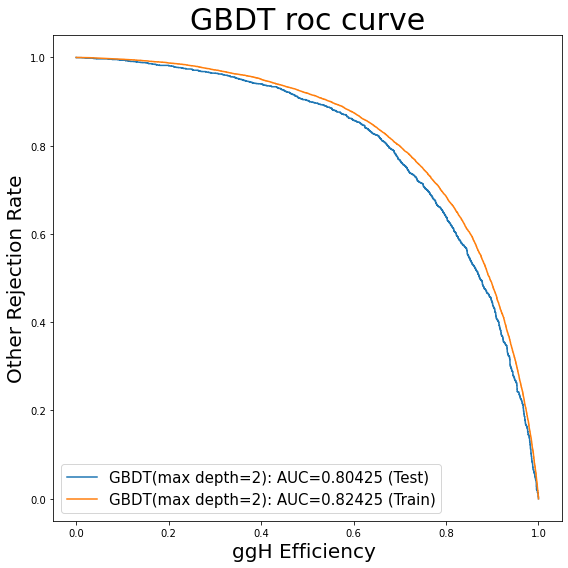

In [408]:
Weighted_event_Index = 0
axis = 0
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"

if Weighted_event_Index == 0:
    prediction_GBDT_test = clf_GBDT.predict_proba(X_test)
    prediction_GBDT_train = clf_GBDT.predict_proba(X_train)
    prediction_Ada_test = clf_Ada.predict_proba(X_test)
    prediction_Ada_train = clf_Ada.predict_proba(X_train)

# elif Weighted_event_Index == 1:
#     prediction_GBDT_test = clf_GBDT.predict_proba(X_test_weighted)
#     prediction_GBDT_train = clf_GBDT.predict_proba(X_train_weighted)
    

# Denominator_train = Xection_train[int((axis+1)%4),:]+ Xection_train[int((axis+2)%4),:]+ Xection_train[int((axis+3)%4),:]
# Denominator_test = Xection_test[int((axis+1)%4),:]+ Xection_test[int((axis+2)%4),:]+ Xection_test[int((axis+3)%4),:]

pridict_model= "GBDT"
if pridict_model == "GBDT":
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]
if pridict_model == "Ada":
    discriminator_test = prediction_Ada_test[:,axis]
    discriminator_train = prediction_Ada_train[:,axis]

#print(prediction_GBDT_train[:,axis])
# discriminator_test = prediction_GBDT_test[:,0]/prediction_GBDT_test[:,3]

# discriminator_test = prediction_GBDT_test[:,axis]/ \
#                 (prediction_GBDT_test[:,int((axis+1)%4)]*((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])+ \
#                  prediction_GBDT_test[:,int((axis+2)%4)]*((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])+ \
#                  prediction_GBDT_test[:,int((axis+3)%4)]*((Xection_train[int((axis+3)%4),:]/Denominator_train)[0]))

# print((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])
# print((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])
# print((Xection_train[int((axis+3)%4),:]/Denominator_train)[0])

# discriminator_train = prediction_GBDT_train[:,0]/prediction_GBDT_train[:,3]

# discriminator_train = prediction_GBDT_train[:,axis]/ \
#                 (prediction_GBDT_train[:,int((axis+1)%4)]*((Xection_test[int((axis+1)%4),:]/Denominator_test)[0])+ \
#                  prediction_GBDT_train[:,int((axis+2)%4)]*((Xection_test[int((axis+2)%4),:]/Denominator_test)[0])+ \
#                  prediction_GBDT_train[:,int((axis+3)%4)]*((Xection_test[int((axis+3)%4),:]/Denominator_test)[0]))

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

if Weighted_event_Index == 0:
    y_test = to_categorical(Y_test-1)
    y_train = to_categorical(Y_train-1)
elif Weighted_event_Index == 1:
    y_test = to_categorical(Y_test_weighted-1)
    y_train = to_categorical(Y_train_weighted-1)

test_auc_test = metrics.roc_auc_score(y_test[:,axis],discriminator_test)
FalsePositiveFull_test, TruePositiveFull_test, _ = metrics.roc_curve(y_test[:,axis],discriminator_test)

train_auc_train = metrics.roc_auc_score(y_train[:,axis],discriminator_train)
FalsePositiveFull_train, TruePositiveFull_train, _ = metrics.roc_curve(y_train[:,axis],discriminator_train)

plt.figure(figsize=(8,8))

plt.plot(TruePositiveFull_test,1-FalsePositiveFull_test, label='{a}(max depth=2): AUC={b:.5f} (Test)'.format(a=pridict_model,b=test_auc_test))
plt.plot(TruePositiveFull_train,1-FalsePositiveFull_train, label='{a}(max depth=2): AUC={b:.5f} (Train)'.format(a=pridict_model,b=train_auc_train))
#(TP,TN)
plt.title("{a} roc curve".format(a=pridict_model),fontsize=30,pad=-350)

plt.ylabel('Other Rejection Rate',fontsize=20)
plt.xlabel(str(process)+' Efficiency ',fontsize=20)
plt.legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

# plt.savefig("./Higgs_Pt/ROC.pdf", transparent=True)
plt.show()

## correlation

(8, 8)


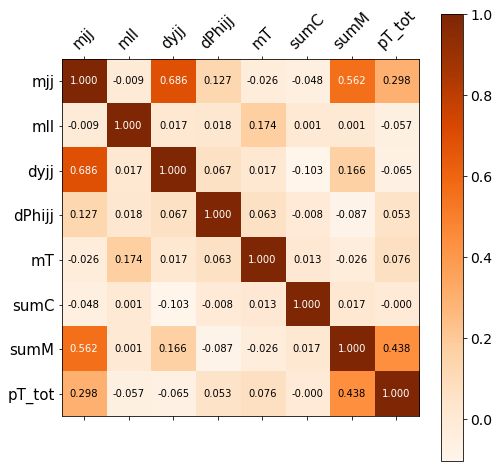

In [409]:
features =["mjj",
           "mll",
           "dyjj",
           "dPhijj",
           "mT",
           "sumC",
           "sumM",
           "pT_tot",
           ]

df = Data_train[Data_train["isGGH"]==1][features]


namelist =["mjj",
           "mll",
           "dyjj",
           "dPhijj",
           "mT",
           "sumC",
           "sumM",
           "pT_tot",
           ]

s = len(namelist)
f = plt.figure(figsize=(s, s))
print(df.corr().shape)
plt.matshow(df.corr(),fignum=f.number, cmap="Oranges")
plt.xticks(range(df.shape[1]), namelist, fontsize=15, rotation=45)
plt.yticks(range(df.shape[1]), namelist, fontsize=15)
plt.ylim((7.5,-0.5))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
for (i, j), z in np.ndenumerate(df.corr()):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',fontsize=10,color=colors)
# plt.savefig("./Higgs_Pt/correlation_matrix.png", transparent=True)
plt.show()

## check over fitting

5124
5124
5124


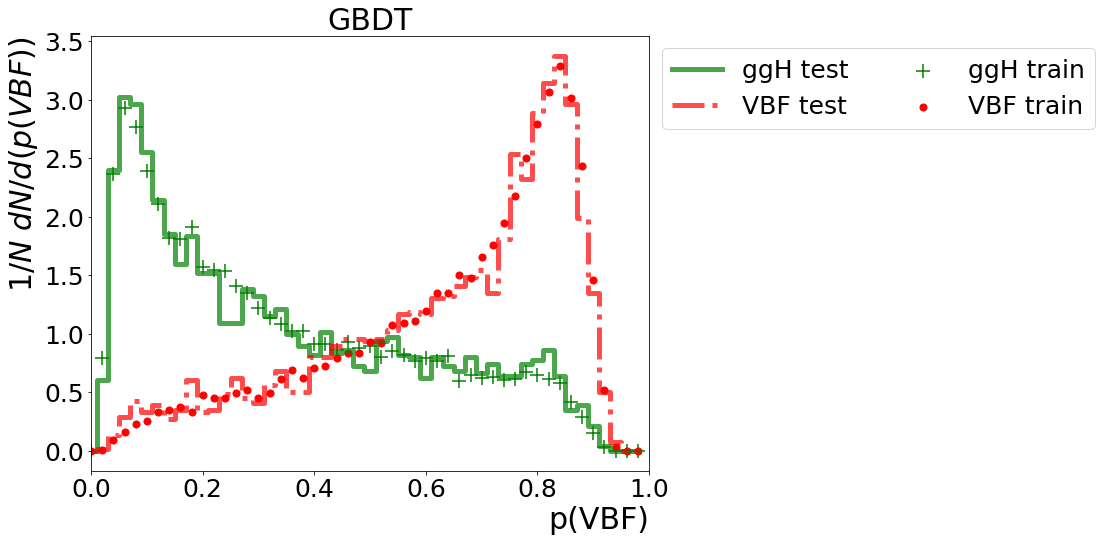

In [412]:
axis = 1
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"

    

xbin = np.linspace(0,1,51)

plt.figure(figsize=(10,8))
Datatest = pd.DataFrame()
Datatest["target"] = Y_test
print(len(Datatest))
pridict_model="GBDT"
if pridict_model == "GBDT":
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]
if pridict_model == "Ada":
    discriminator_test = prediction_Ada_test[:,axis]
    discriminator_train = prediction_Ada_train[:,axis]
print(len(discriminator_test))
Datatest["pre"] = discriminator_test
ggh = Datatest[Datatest["target"]==1]
vbf = Datatest[Datatest["target"]==2]
print(len(Datatest))



ggh_hist, ggh_bins = np.histogram(ggh["pre"], bins=xbin)
plt.step(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,"-",color = "green", where='mid',linewidth=5, alpha=0.7,label="ggH test") 
vbf_hist, vbf_bins = np.histogram(vbf["pre"], bins=xbin)
plt.step(vbf_bins[:-1], vbf_hist.astype(np.float32)/sum(vbf_hist)/0.02 ,"-.",color = "red", where='mid',linewidth=5, alpha=0.7,label="VBF test") 

Datatrain = pd.DataFrame()
Datatrain["target"] = Y_train
Datatrain["pre_train"] = discriminator_train
ggh = Datatrain[Datatrain["target"]==1]
vbf = Datatrain[Datatrain["target"]==2]

ggh_hist, ggh_bins = np.histogram(ggh["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,marker = "+",c ="g",s=200,label="ggH train")
vbf_hist, vbf_bins = np.histogram(vbf["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(vbf_bins[:-1], vbf_hist.astype(np.float32)/sum(vbf_hist)/0.02 ,marker = ".",c ="r",s=200,label="VBF train")

plt.title("{a}".format(a=pridict_model),fontsize=30,pad=-350)

plt.xlim(0,1)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.xlabel("p({0})".format(process), fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("$1/N\,\,dN/d (p({0}))$".format(process),fontsize=30,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=25)
# plt.tight_layout()
# plt.savefig("./Higgs_Pt/BDT_score_seperate.pdf", transparent=True)
plt.show()

[ 0  0  0  1  2  0  2  1  6  2  2  2  1  4  2  3  3  7  2  3  4  3  4  5
  5  6  4 15 10 10 11  2  8  8 11 14  8  7 10 14 17  8 19 11 18 10  7  8
  0  0]


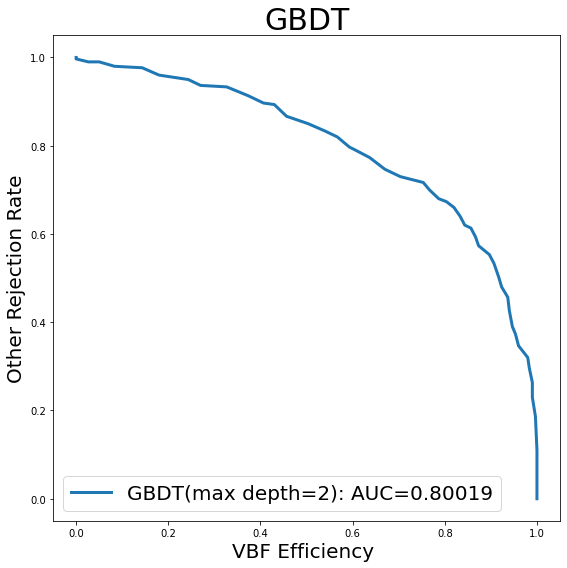

In [361]:
axis = 1
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"

pridict_model="GBDT"
if pridict_model == "GBDT":
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]
if pridict_model == "Ada":
    discriminator_test = prediction_Ada_test[:,axis]
    discriminator_train = prediction_Ada_train[:,axis]

Datatest = pd.DataFrame()
Datatest["target"] = Y_test
Datatest["pre"] = discriminator_test
test = Datatest[Datatest["target"]==axis+1]


other_test = Datatest[Datatest["target"]!=axis+1]

hist, bins = np.histogram(test["pre"], bins=xbin)
# ggh_hist = ggh_hist/len(ggh)*ggh_weight[2][0]*300*1000
# vbf_hist, vbf_bins = np.histogram(vbf_test["pre"], bins=xbin)
# vbf_hist = vbf_hist/len(vbf)*vbf_weight[2][0]*300*1000
# vh_hist, vh_bins = np.histogram(vh_test["pre"], bins=xbin)
# vh_hist = vh_hist/len(vh)*vh_weight[2][0]*300*1000
# tth_hist, tth_bins = np.histogram(tth_test["pre"], bins=xbin)
# tth_hist = tth_hist/len(tth)*tth_weight[2][0]*300*1000
# other_hist = vbf_hist+vh_hist+tth_hist
# other_bins = vbf_bins

other_hist, other_bins = np.histogram(other_test["pre"], bins=xbin)


print(hist)
# other_hist, other_bins = np.histogram(other_test["pre"], bins=xbin)


efficiency, bkg_efficiency = [], []
for i in range(len(bins)):
   
    efficiency.append(1-sum(hist[:i])/sum(hist)) #true positive?
    bkg_efficiency.append(sum(other_hist[:i])/sum(other_hist)) #true negative
    
test_auc_test = metrics.roc_auc_score(y_test[:,axis],discriminator_test)
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.plot(efficiency,bkg_efficiency, linewidth = 3, label='{a}(max depth=2): AUC={b:.5f}'.format(a=pridict_model,b=test_auc_test))
plt.title("{a}".format(a=pridict_model),fontsize=30,pad=-350)
plt.ylabel('Other Rejection Rate',fontsize=20)
plt.xlabel(str(process)+' Efficiency ',fontsize=20)
plt.legend(ncol=1,fontsize=20) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

# plt.savefig("./Higgs_Pt/Comparison_ROC", transparent=True)
plt.show()

In [ ]:
path_train = "./BDT_Model_for_train/"
path_test = "./BDT_Model_for_test/"
Data_test["prediction"] = discriminator_test
Data_test.to_csv(path_test + "Data_train_w_pre_800.csv",index = 0)

In [ ]:
x = np.array([3, 1, 2])
print(np.argsort(x))